In [3]:
import os
import time
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from feature_creation import *

# Dash modules
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import plotly.express as px

# Set up jupyter proxy
JupyterDash.infer_jupyter_proxy_config()

%matplotlib inline

In [5]:
# Creating stock_df from feature file
stock_df = daily_features()
stock_df.head()

,Close,Dividends,High,Low,Open,Stock Splits,Volume,sector,test,ticker,SMA_5,SMA_15,SMA_ratio,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,
1990-02-16,0.057364,0.0,0.059298,0.054786,0.0,0.0,940636800.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-20,0.059297,0.0,0.059297,0.055430,0.0,0.0,151862400.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-21,0.058008,0.0,0.058653,0.056075,0.0,0.0,70531200.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-22,0.058653,0.0,0.060586,0.058653,0.0,0.0,45216000.0,Technology,NaN,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-23,0.058331,0.0,0.059297,0.058008,0.0,0.0,44697600.0,Technology,NaN,CSCO,0.058331,NaN,NaN,NaN,NaN,NaN


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



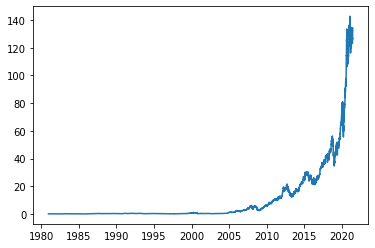

In [8]:
# Plotting one ticker to ensure data looks correct
plt.plot(stock_df[stock_df['ticker']=='AAPL'].index, stock_df[stock_df['ticker']=='AAPL']['Close'])

In [9]:
stock_df.tail(10)

,Close,Dividends,High,Low,Open,Stock Splits,Volume,sector,test,ticker,SMA_5,SMA_15,SMA_ratio,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,
2021-06-09,28.990000,0.415,29.090000,28.420000,28.480000,0.0,6790000.0,Utilities,NaN,PPL,28.662880,28.743393,1.002809,0.195221,29.133835,28.352952
2021-06-10,29.080000,0.000,29.280001,28.969999,29.080000,0.0,6032700.0,Utilities,NaN,PPL,28.758225,28.752177,0.999790,0.207663,29.167503,28.336851
2021-06-11,29.330000,0.000,29.370001,29.010000,29.110001,0.0,6016800.0,Utilities,NaN,PPL,28.909483,28.779598,0.995507,0.253351,29.286299,28.272897
2021-06-14,29.260000,0.000,29.440001,29.129999,29.330000,0.0,4833000.0,Utilities,NaN,PPL,29.029000,28.791839,0.991830,0.272432,29.336702,28.246975
2021-06-15,29.299999,0.000,29.490000,29.110001,29.200001,0.0,3232400.0,Utilities,NaN,PPL,29.192000,28.810032,0.986915,0.297247,29.404526,28.215538
2021-06-16,28.680000,0.000,29.379999,28.660000,29.370001,0.0,4524300.0,Utilities,NaN,PPL,29.130000,28.809233,0.988988,0.297603,29.404438,28.214027
2021-06-17,28.600000,0.000,28.830000,28.469999,28.620001,0.0,5129400.0,Utilities,NaN,PPL,29.034000,28.800472,0.991957,0.301960,29.404391,28.196553
2021-06-18,27.610001,0.000,28.459999,27.590000,28.440001,0.0,9829400.0,Utilities,NaN,PPL,28.690000,28.732282,1.001474,0.430605,29.593493,27.871072
2021-06-21,28.120001,0.000,28.150000,27.670000,27.730000,0.0,5373100.0,Utilities,NaN,PPL,28.462000,28.694150,1.008156,0.458830,29.611809,27.776491


In [10]:
import yfinance as yf

In [11]:
stock = yf.Ticker('AAPL')
hist = stock.history(period='max')

In [12]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-28,133.410004,135.250000,133.350006,134.779999,62111300,0.0,0.0
2021-06-29,134.800003,136.490005,134.350006,136.330002,64556100,0.0,0.0
2021-06-30,136.169998,137.410004,135.869995,136.960007,63261400,0.0,0.0


In [14]:
stock = yf.download('AAPL',period='max')

[*********************100%***********************]  1 of 1 completed


In [15]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600
...,...,...,...,...,...,...
2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62111300
2021-06-29,134.800003,136.490005,134.350006,136.330002,136.330002,64556100
2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400


In [17]:
msft = yf.Ticker("MSFT")

In [21]:
# Create new csv with analyst recommendations
msft.recommendations()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-05-13 11:05:37,Rosenblatt,Buy,,init
2021-05-18 13:39:15,Jefferies,Buy,,main
2021-06-02 12:20:01,KGI Securities,Outperform,,init


In [26]:
msft.recommendations.groupby('To Grade').count().sort_values(by='From Grade')

,Firm,From Grade,Action
To Grade,,,
,1,1,1
Long-Term Buy,1,1,1
Perform,1,1,1
Sector Perform,2,2,2
Underweight,2,2,2
Equal-Weight,6,6,6
Underperform,6,6,6
Strong Buy,9,9,9
Market Perform,10,10,10


In [22]:
# Future earnings
msft.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44102900000,44102900000
Revenue Low,40850000000,40850000000
Revenue High,44914700000,44914700000
